In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from copy import copy

In [2]:
img_height = 100 
img_width = 100
num_classes = 2

In [3]:
slides = []
slides_labe = []
train_set = []
train_label = []

for i in range(1,404):
  path = "/content/drive/MyDrive/NASA Hackathon/Code/landslide/" + str(i) +".jfif"
  image = Image.open(path)
  image_resize = image.resize((100,100))
  image_np = np.asarray(image_resize)
  slides.append(image_np)
  slides_labe.append(1)
  if i < 301:
    train_set.append(image_np)
    train_label.append(1)



In [4]:
scapes = []
scapes_label = []
count = 0
for i in range(1,1340):
  path = "/content/drive/MyDrive/NASA Hackathon/Code/landscape/" + str(i) +".jpg"
  try:
    image = Image.open(path)
    image_resize = image.resize((100,100))
    image_np = np.asarray(image_resize)
    scapes.append(image_np)
    scapes_label.append(0)
    count+=1
    if count < 301:
      train_set.append(image_np)
      train_label.append(0)

  except:
    continue
  


In [5]:
train_set = np.array(train_set)
train_label = np.array(train_label)
train_label = train_label.reshape([600, 1])

print(train_set.shape, train_label.shape)

shuffler = np.random.permutation(600)
train_shuffled = train_set[shuffler]
label_shuffled = train_label[shuffler]

(600, 100, 100, 3) (600, 1)


In [6]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation((-1,1)),
    layers.RandomZoom(0.5),
  ]
)

In [7]:
scapes = np.array(scapes)
slides = np.array(slides)

In [8]:
model = Sequential([
                    layers.RandomFlip("horizontal",
                                      input_shape=(img_height,
                                                   img_width,
                                                   3)),
                    layers.RandomRotation((-1,1)),
                    layers.RandomZoom(0.5),

                    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(128, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.4),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes, activation = 'sigmoid')
                    ])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 100, 100, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 100, 100, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 100, 100, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)       

In [11]:
epochs=150
history = model.fit(
  train_shuffled,label_shuffled,
  validation_split=0.20,
  batch_size=8,
  epochs=epochs
)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


60/60 [==============================] - 9s 124ms/step - loss: 0.7087 - accuracy: 0.5125 - val_loss: 0.6912 - val_accuracy: 0.5167
Epoch 2/150
60/60 [==============================] - 7s 121ms/step - loss: 0.6948 - accuracy: 0.4667 - val_loss: 0.6933 - val_accuracy: 0.4833
Epoch 3/150
60/60 [==============================] - 7s 121ms/step - loss: 0.6934 - accuracy: 0.5063 - val_loss: 0.6828 - val_accuracy: 0.5333
Epoch 4/150
60/60 [==============================] - 7s 120ms/step - loss: 0.6863 - accuracy: 0.5688 - val_loss: 0.6887 - val_accuracy: 0.5250
Epoch 5/150
60/60 [==============================] - 7s 121ms/step - loss: 0.6758 - accuracy: 0.5312 - val_loss: 0.6846 - val_accuracy: 0.5167
Epoch 6/150
60/60 [==============================] - 7s 120ms/step - loss: 0.6923 - accuracy: 0.5708 - val_loss: 0.6828 - val_accuracy: 0.5167
Epoch 7/150
60/60 [==============================] - 7s 120ms/step - loss: 0.6665 - accuracy: 0.5688 - val_loss: 0.6882 - val_accuracy: 0.5167
Epoch 8/150

In [12]:
a = copy(scapes[350, :, :, :])
a = a.reshape(1,100,100,3)
print(model.predict(a))

[[0.73186994 0.524961  ]]


In [13]:
keys = history.history.keys()
print(keys)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


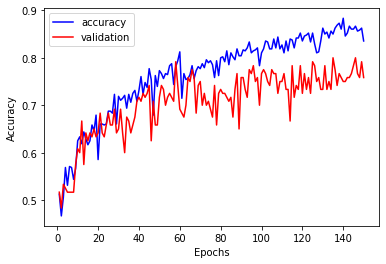

In [15]:
x = np.linspace(1,150,num = 150)

plt.plot(x, history.history['accuracy'], color = "blue", label='accuracy')
plt.plot(x, history.history['val_accuracy'], color = "red", label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('/content/drive/MyDrive/NASA Hackathon/Code/accuracy.png')

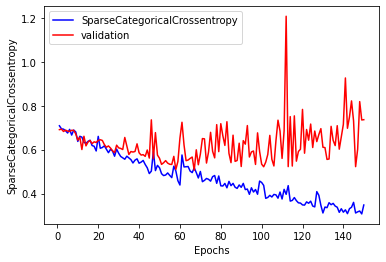

In [16]:
x = np.linspace(1,150,num = 150)

plt.plot(x, history.history['loss'], color = "blue", label='SparseCategoricalCrossentropy')
plt.plot(x, history.history['val_loss'], color = "red", label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('SparseCategoricalCrossentropy')
plt.savefig('/content/drive/MyDrive/NASA Hackathon/Code/loss.png')

Optimal Epochs for Training = 70

In [18]:
model_opt = Sequential([
                    layers.RandomFlip("horizontal",
                                      input_shape=(img_height,
                                                   img_width,
                                                   3)),
                    layers.RandomRotation((-1,1)),
                    layers.RandomZoom(0.5),

                    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(128, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.4),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes, activation = 'sigmoid')
                    ])


model_opt.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=70
history_opt = model_opt.fit(
  train_shuffled,label_shuffled,
  validation_split=0.20,
  batch_size=8,
  epochs=epochs
)

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


60/60 [==============================] - 9s 127ms/step - loss: 0.7062 - accuracy: 0.4833 - val_loss: 0.6875 - val_accuracy: 0.5167
Epoch 2/70
60/60 [==============================] - 8s 125ms/step - loss: 0.6667 - accuracy: 0.5958 - val_loss: 0.6198 - val_accuracy: 0.6583
Epoch 3/70
60/60 [==============================] - 7s 124ms/step - loss: 0.6549 - accuracy: 0.6125 - val_loss: 0.7156 - val_accuracy: 0.5333
Epoch 4/70
60/60 [==============================] - 7s 124ms/step - loss: 0.6257 - accuracy: 0.6604 - val_loss: 0.5868 - val_accuracy: 0.6833
Epoch 5/70
60/60 [==============================] - 8s 128ms/step - loss: 0.5776 - accuracy: 0.7146 - val_loss: 0.5633 - val_accuracy: 0.6917
Epoch 6/70
60/60 [==============================] - 8s 128ms/step - loss: 0.5687 - accuracy: 0.7208 - val_loss: 0.7150 - val_accuracy: 0.5750
Epoch 7/70
60/60 [==============================] - 7s 125ms/step - loss: 0.5665 - accuracy: 0.7250 - val_loss: 0.5593 - val_accuracy: 0.7333
Epoch 8/70
60/60 

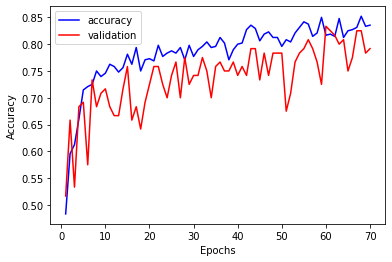

In [20]:
x = np.linspace(1,70,num = 70)

plt.plot(x, history_opt.history['accuracy'], color = "blue", label='accuracy')
plt.plot(x, history_opt.history['val_accuracy'], color = "red", label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('/content/drive/MyDrive/NASA Hackathon/Code/accuracy_opt.png')

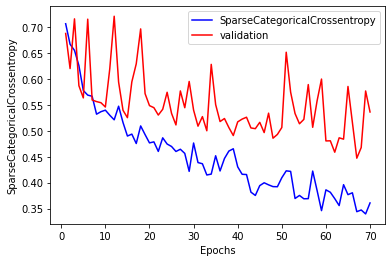

In [22]:

plt.plot(x, history_opt.history['loss'], color = "blue", label='SparseCategoricalCrossentropy')
plt.plot(x, history_opt.history['val_loss'], color = "red", label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('SparseCategoricalCrossentropy')
plt.savefig('/content/drive/MyDrive/NASA Hackathon/Code/loss_opt.png')

[[0.58163184 0.7841934 ]]


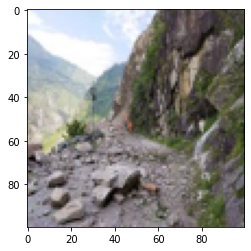

In [51]:
a = copy(slides[400, :, :, :])
a = a.reshape(1,100,100,3)
print(model.predict(a))
plt.imshow(slides[400, :, :, :])

[[0.24339736 0.97097695]]


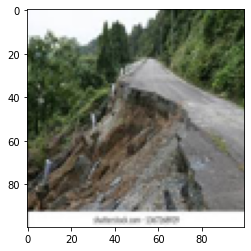

In [50]:
a = copy(slides[311, :, :, :])
a = a.reshape(1,100,100,3)
print(model.predict(a))
plt.imshow(slides[311, :, :, :])

[[0.4532863 0.8931942]]


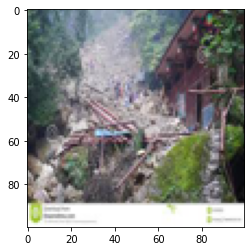

In [49]:
a = copy(slides[330, :, :, :])
a = a.reshape(1,100,100,3)
print(model.predict(a))
plt.imshow(slides[330, :, :, :])

[[0.5157791 0.8148444]]


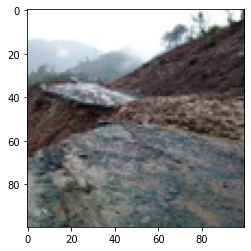

In [48]:
n=307
a = copy(slides[n, :, :, :])
a = a.reshape(1,100,100,3)
print(model.predict(a))
plt.imshow(slides[n, :, :, :])

[[0.9427512 0.1756418]]


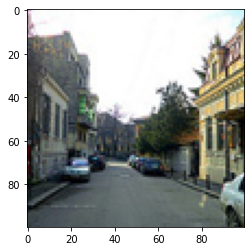

In [31]:
n=305

a = copy(scapes[n, :, :, :])
a = a.reshape(1,100,100,3)
print(model.predict(a))

plt.imshow(scapes[n, :, :, :])

[[0.64045346 0.37771377]]


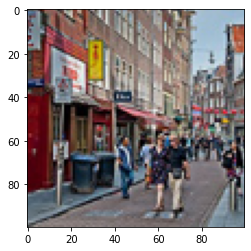

In [52]:
n=310

a = copy(scapes[n, :, :, :])
a = a.reshape(1,100,100,3)
print(model.predict(a))

plt.imshow(scapes[n, :, :, :])

[[0.65811867 0.31321263]]


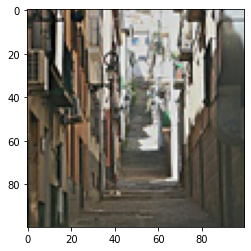

In [54]:
n=320

a = copy(scapes[n, :, :, :])
a = a.reshape(1,100,100,3)
print(model.predict(a))

plt.imshow(scapes[n, :, :, :])

[[0.70301354 0.6032643 ]]


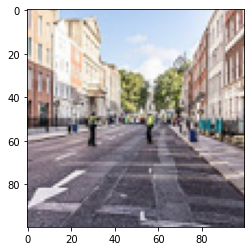

In [55]:
n=338

a = copy(scapes[n, :, :, :])
a = a.reshape(1,100,100,3)
print(model.predict(a))

plt.imshow(scapes[n, :, :, :])